HEART DISEASE PREDICTION 

1. Importing essential libraries

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

pandas: Pandas is a powerful library in Python used for data manipulation and analysis, particularly for handling tabular data (e.g., CSV files, Excel sheets) using data structures like DataFrames.
numpy: NumPy is another fundamental library in Python for numerical computations and provides support for working with arrays and matrices.
matplotlib.pyplot:  Matplotlib is one of the most popular plotting libraries in Python, and the 'pyplot' module provides a simple interface to create various types of plots and visualizations.
seaborn: Seaborn is used for statistical data visualization and provides a high-level interface to create attractive and informative statistical graphics.

In [28]:
dataset = pd.read_csv("heart.csv")

Verifying it as a 'dataframe' object in pandas

In [29]:
type(dataset)

pandas.core.frame.DataFrame

shape of a dataset


In [30]:
dataset.shape

(303, 14)

printing out a few columns

In [7]:
dataset.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [8]:
dataset.sample(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
276,58,1,0,146,218,0,1,105,0,2.0,1,1,3,0
47,47,1,2,138,257,0,0,156,0,0.0,2,0,2,1
131,49,0,1,134,271,0,1,162,0,0.0,1,0,2,1
240,70,1,2,160,269,0,1,112,1,2.9,1,1,3,0
100,42,1,3,148,244,0,0,178,0,0.8,2,2,2,1


understanding the columns in the dataset

In [11]:
info = ["age","1: male, 0: female","chest pain type, 1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic","resting blood pressure"," serum cholestoral in mg/dl","fasting blood sugar > 120 mg/dl","resting electrocardiographic results (values 0,1,2)"," maximum heart rate achieved","exercise induced angina","oldpeak = ST depression induced by exercise relative to rest","the slope of the peak exercise ST segment","number of major vessels (0-3) colored by flourosopy","thal: 3 = normal; 6 = fixed defect; 7 = reversable defect"]



for i in range(len(info)):
    print(dataset.columns[i]+":\t\t\t"+info[i])

age:			age
sex:			1: male, 0: female
cp:			chest pain type, 1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic
trestbps:			resting blood pressure
chol:			 serum cholestoral in mg/dl
fbs:			fasting blood sugar > 120 mg/dl
restecg:			resting electrocardiographic results (values 0,1,2)
thalach:			 maximum heart rate achieved
exang:			exercise induced angina
oldpeak:			oldpeak = ST depression induced by exercise relative to rest
slope:			the slope of the peak exercise ST segment
ca:			number of major vessels (0-3) colored by flourosopy
thal:			thal: 3 = normal; 6 = fixed defect; 7 = reversable defect


Analysing the "target" variable 

In [31]:
dataset["target"].unique()

array([1, 0], dtype=int64)

Clearly, this is a classification problem, with the target variable having values '0' and '1'

Exploratory Data Analysis (EDA)
First, analysing the target variable:

1    165
0    138
Name: target, dtype: int64


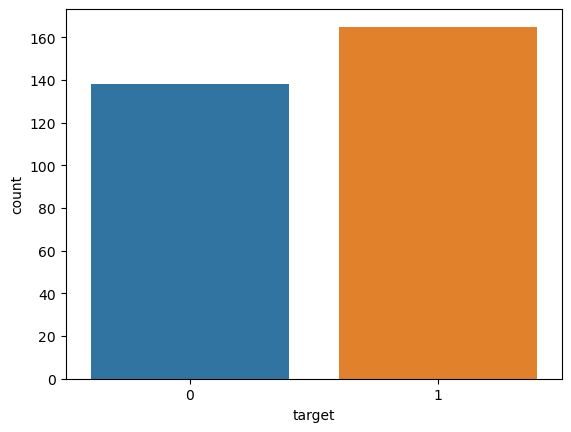

In [35]:
sns.countplot(x="target", data=dataset)
target_temp = dataset.target.value_counts()
print(target_temp)

In [13]:
print("Percentage of patience without heart problems: "+str(round(target_temp[0]*100/303,2)))
print("Percentage of patience with heart problems: "+str(round(target_temp[1]*100/303,2)))

Percentage of patience without heart problems: 45.54
Percentage of patience with heart problems: 54.46


We'll analyse 'sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca' and 'thal' features


Analysing the 'Sex' feature

In [34]:
dataset["sex"].unique()

array([1, 0], dtype=int64)

We notice, that as expected, the 'sex' feature has 2 unique features

<Axes: xlabel='sex', ylabel='target'>

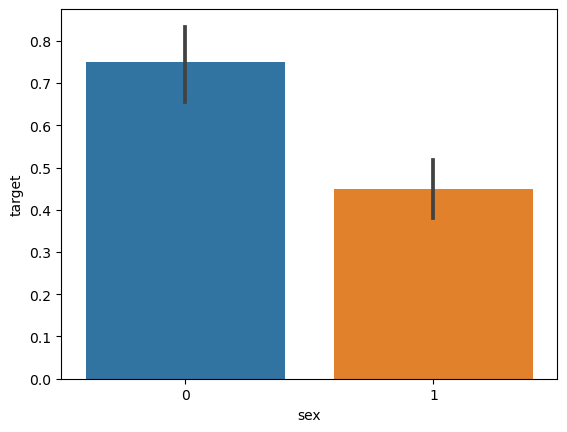

In [36]:
sns.barplot(x="sex",y="target", data=dataset)

We notice, that females are more likely to have heart problems than males



Analysing the 'Chest Pain Type' feature

In [37]:
dataset["cp"].unique()

array([3, 2, 1, 0], dtype=int64)

As expected, the CP feature has values from 0 to 3

<Axes: xlabel='cp', ylabel='target'>

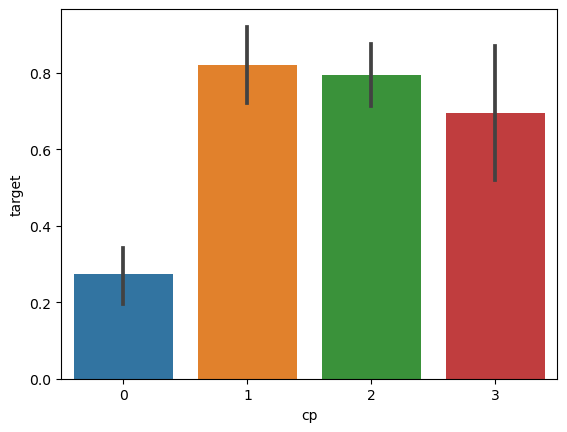

In [38]:
sns.barplot(x="cp", y="target", data=dataset)


We notice, that chest pain of '0', i.e. the ones with typical angina are much less likely to have heart problems


Analysing the FBS feature

In [39]:
dataset["fbs"].unique()

array([1, 0], dtype=int64)

<Axes: xlabel='fbs', ylabel='target'>

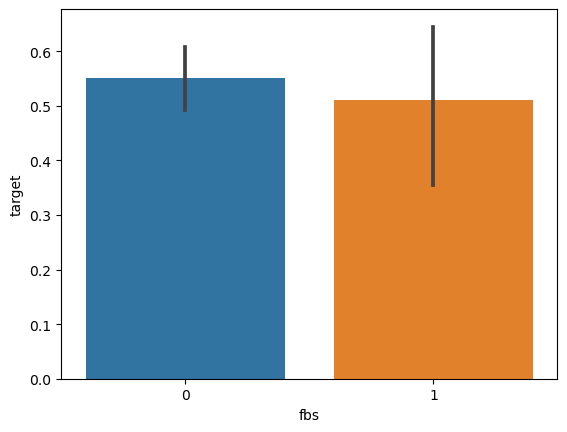

In [40]:
sns.barplot(x="fbs", y="target", data=dataset)

No much difference because fbs is weakly correlated

analysing the restecg feature

In [41]:
dataset["restecg"].unique()

array([0, 1, 2], dtype=int64)

<Axes: xlabel='restecg', ylabel='target'>

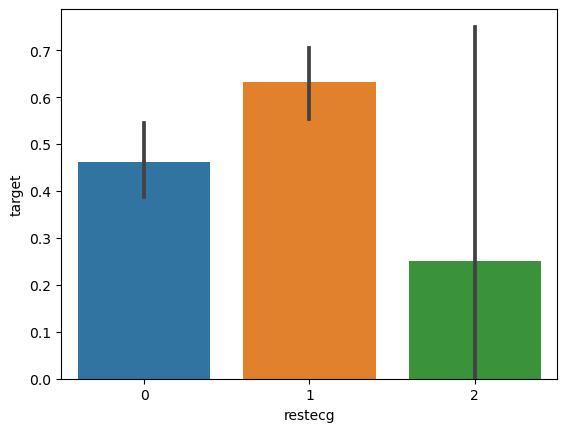

In [42]:
sns.barplot(x="restecg", y="target", data=dataset)

We realize that people with restecg '1' and '0' are much more likely to have a heart disease than with restecg '2'


Analysing the 'exang' feature

In [43]:
dataset["exang"].unique()

array([0, 1], dtype=int64)

<Axes: xlabel='exang', ylabel='target'>

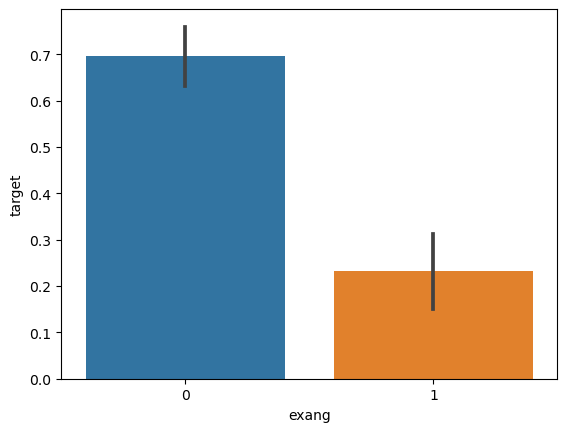

In [44]:
sns.barplot(x="exang", y="target", data=dataset)

People with exang=1 i.e. Exercise induced angina are much less likely to have heart problems


Analysing the Slope feature

In [45]:
dataset["slope"].unique()

array([0, 2, 1], dtype=int64)

<Axes: xlabel='slope', ylabel='target'>

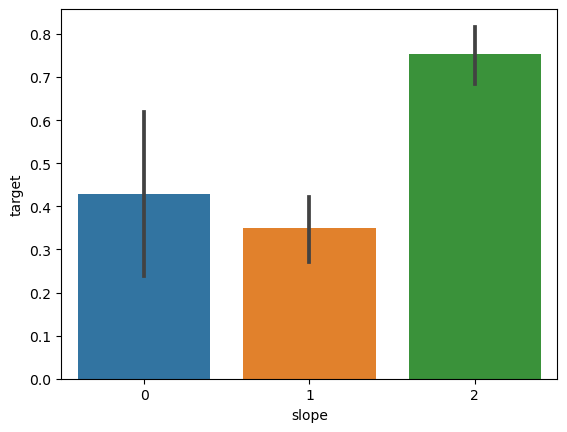

In [46]:
sns.barplot(x="slope", y="target", data=dataset)

We observe, that Slope '2' causes heart pain much more than Slope '0' and '1'


Analysing the 'ca' feature

In [48]:
dataset["ca"].unique()

array([0, 2, 1, 3, 4], dtype=int64)

<Axes: xlabel='ca', ylabel='count'>

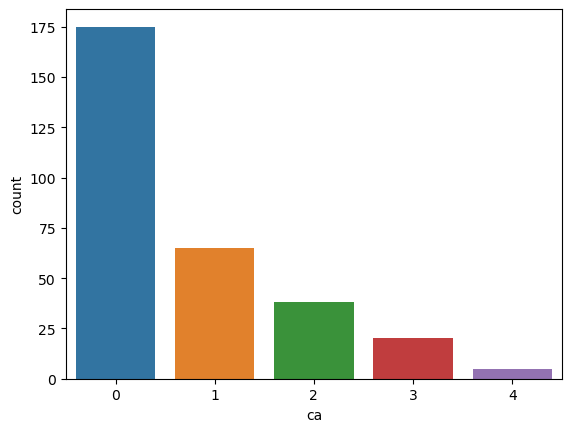

In [49]:
sns.countplot(x="ca", data=dataset)

most of them have no vessels coloured by flourosopy

<Axes: xlabel='ca', ylabel='target'>

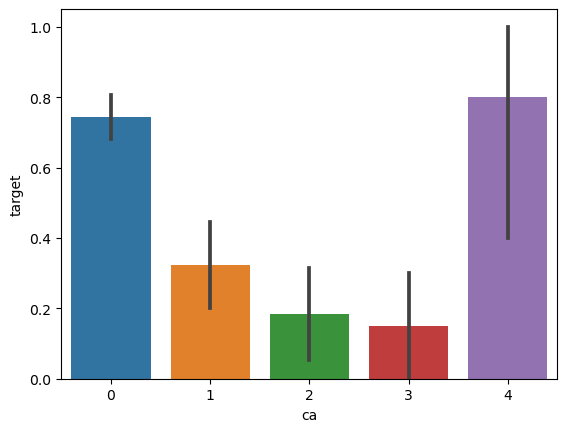

In [50]:
sns.barplot(x="ca", y="target", data=dataset)

ca=4 has astonishingly large number of heart patients


Analysing the 'thal' feature


In [51]:
dataset["thal"].unique()

array([1, 2, 3, 0], dtype=int64)

<Axes: xlabel='thal', ylabel='target'>

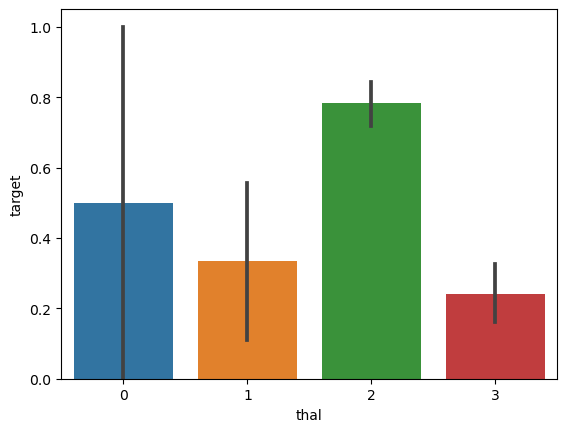

In [52]:
sns.barplot(x="thal", y="target", data=dataset)

TRAIN TEST SPLIT



In [54]:
from sklearn.model_selection import train_test_split

predictors = dataset.drop("target",axis=1)
target = dataset["target"]

X_train,X_test,Y_train,Y_test = train_test_split(predictors,target,test_size=0.20,random_state=0)

To split the data into training and testing sets for a machine learning model.
1. predictors: This variable represents the feature matrix or the set of input variables used to predict the target variable. In this case, We are creating it by dropping the "target" column from the original dataset

2. target: This variable represents the target variable you want to predict. In this case, it is the "target" column from the original dataset.

3. train_test_split(predictors, target, test_size=0.20, random_state=0): This function is used to split the dataset into training and testing sets. The predictors and target variables are provided as the input data. The test_size parameter is set to 0.20, indicating that 20% of the data will be used for testing, and the remaining 80% will be used for training. The random_state parameter is set to 0 to ensure reproducibility; using the same value for random_state will give you the same split each time you run the code.

X_train: This contains the feature matrix for the training set.

X_test: This contains the feature matrix for the testing set.

Y_train: This contains the target variable for the training set.

Y_test: This contains the target variable for the testing set.

In [55]:
X_train.shape

(242, 13)

In [56]:
X_test.shape

(61, 13)

In [57]:
Y_train.shape

(242,)

In [58]:
Y_test.shape

(61,)

MODEL FITTING 

In [59]:
from sklearn.metrics import accuracy_score

To import the accuracy_score function from the sklearn.metrics module. The accuracy_score function is commonly used in machine learning to evaluate the accuracy of a classification model.

Logistic Regression

In [61]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

lr.fit(X_train,Y_train)

Y_pred_lr = lr.predict(X_test)

creating a Logistic Regression model and fitting the tarining data to the model using fit function 

 using the trained logistic regression model to make predictions on the test data. The X_test contains the feature matrix of the test set, and the model will predict the target values for the test samples. The predicted values are stored in the Y_pred_lr variable.

In [62]:
score_lr = round(accuracy_score(Y_pred_lr,Y_test)*100,2)

print("The accuracy score achieved using Logistic Regression is: "+str(score_lr)+" %")

The accuracy score achieved using Logistic Regression is: 85.25 %


This part calculates the accuracy score by comparing the predicted target values (Y_pred_lr) with the true target values (Y_test). The accuracy_score function from sklearn.metrics is used for this purpose.

multiplying the accuracy to obtain in percentage and rounding it off to 2 decimal places for makinng it more readable 

Naive Bayes


In [63]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()

nb.fit(X_train,Y_train)

Y_pred_nb = nb.predict(X_test)

score_nb = round(accuracy_score(Y_pred_nb,Y_test)*100,2)

print("The accuracy score achieved using Naive Bayes is: "+str(score_nb)+" %")

The accuracy score achieved using Naive Bayes is: 85.25 %


K Nearest Neighbors

In [64]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train,Y_train)
Y_pred_knn=knn.predict(X_test)

k-NN classifier will consider 7 nearest neighbors to make a prediction for each sample.

In [65]:
score_knn = round(accuracy_score(Y_pred_knn,Y_test)*100,2)

print("The accuracy score achieved using KNN is: "+str(score_knn)+" %")

The accuracy score achieved using KNN is: 67.21 %


Decision Tree

In [67]:
from sklearn.tree import DecisionTreeClassifier

max_accuracy = 0


for x in range(200):
    dt = DecisionTreeClassifier(random_state=x)
    dt.fit(X_train,Y_train)
    Y_pred_dt = dt.predict(X_test)
    current_accuracy = round(accuracy_score(Y_pred_dt,Y_test)*100,2)
    if(current_accuracy>max_accuracy):
        max_accuracy = current_accuracy
        best_x = x
        
#print(max_accuracy)
#print(best_x)


dt = DecisionTreeClassifier(random_state=best_x)
dt.fit(X_train,Y_train)
Y_pred_dt = dt.predict(X_test)

This code segment performs hyperparameter tuning for a Decision Tree Classifier by finding the value of the random_state parameter that gives the highest accuracy on the test set. The best random_state value is then used to train the final Decision Tree model.

the loop is iterated for 200 times and for each state if the current accuracy is greater than max accuracy , max accuracy is replaced with the current accuracy and best_x with current state to keep track which set has max accuracy 

After the loop finishes, a new instance of the DecisionTreeClassifier is created, and the random_state is set to the value of best_x, which corresponds to the random_state value that gave the highest accuracy during the loop.

The final Decision Tree model is trained on the training set using the best random_state.

The final model's predictions are obtained on the test set X_test.

In [68]:
score_dt = round(accuracy_score(Y_pred_dt,Y_test)*100,2)

print("The accuracy score achieved using Decision Tree is: "+str(score_dt)+" %")

The accuracy score achieved using Decision Tree is: 81.97 %


Random Forest

In [69]:
from sklearn.ensemble import RandomForestClassifier

max_accuracy = 0


for x in range(2000):
    rf = RandomForestClassifier(random_state=x)
    rf.fit(X_train,Y_train)
    Y_pred_rf = rf.predict(X_test)
    current_accuracy = round(accuracy_score(Y_pred_rf,Y_test)*100,2)
    if(current_accuracy>max_accuracy):
        max_accuracy = current_accuracy
        best_x = x
        
#print(max_accuracy)
#print(best_x)

rf = RandomForestClassifier(random_state=best_x)
rf.fit(X_train,Y_train)
Y_pred_rf = rf.predict(X_test)

Same as decision tree but the loop is iterated for 2000 times with random forest classifier model 

In [73]:
score_rf = round(accuracy_score(Y_pred_rf,Y_test)*100,2)

print("The accuracy score achieved using Decision Tree is: "+str(score_rf)+" %")


The accuracy score achieved using Decision Tree is: 90.16 %


OUTPUT FINAL SCORE


In [75]:
scores = [score_lr,score_nb,score_knn,score_dt,score_rf]
algorithms = ["Logistic Regression","Naive Bayes","K-Nearest Neighbors","Decision Tree","Random Forest"]    

for i in range(len(algorithms)):
    print("The accuracy score achieved using "+algorithms[i]+" is: "+str(scores[i])+" %")

The accuracy score achieved using Logistic Regression is: 85.25 %
The accuracy score achieved using Naive Bayes is: 85.25 %
The accuracy score achieved using K-Nearest Neighbors is: 67.21 %
The accuracy score achieved using Decision Tree is: 81.97 %
The accuracy score achieved using Random Forest is: 90.16 %


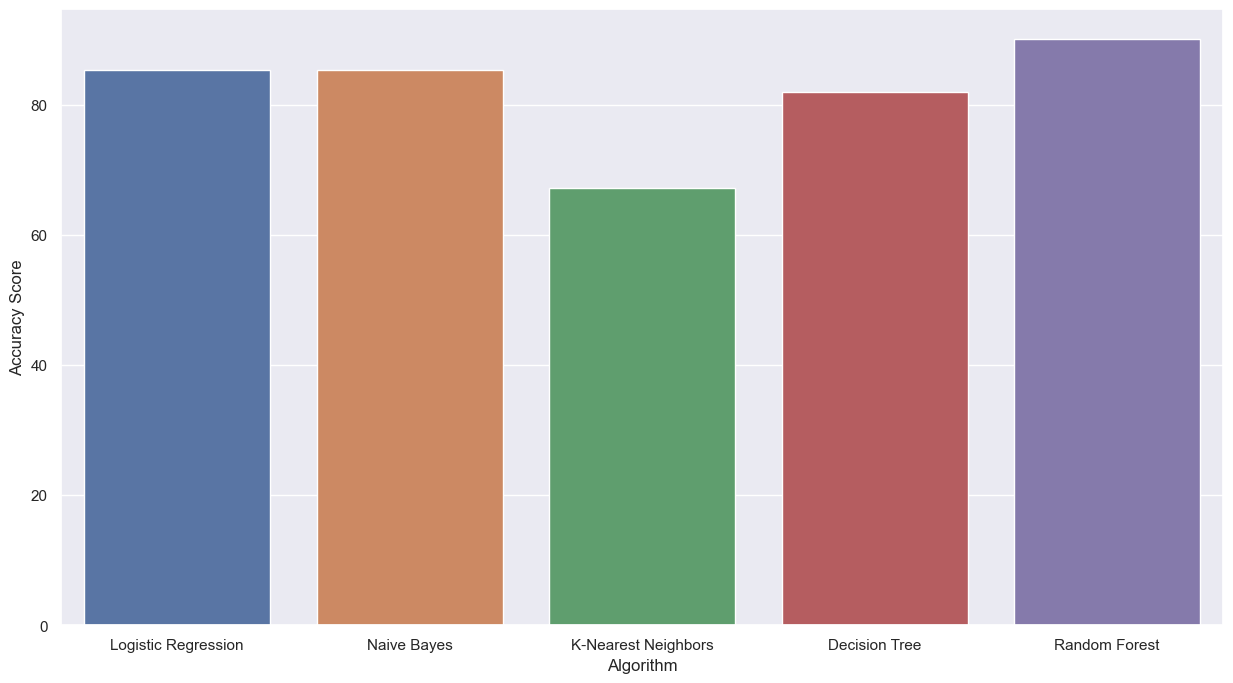

In [82]:
scores = [score_lr, score_nb, score_knn, score_dt, score_rf]
algorithms = ["Logistic Regression", "Naive Bayes", "K-Nearest Neighbors", "Decision Tree", "Random Forest"]

data = pd.DataFrame({"Algorithm": algorithms, "Accuracy Score": scores})

sns.set(rc={'figure.figsize':(15,8)})
plt.xlabel("Algorithms")
plt.ylabel("Accuracy score")

sns.barplot(x="Algorithm", y="Accuracy Score", data=data)
plt.show()

RANDOM FOREST has good result as compare to other algorithms
